# Subplots
---

## Questions
- How can I make a figure containing more than one plot?

## Learning Objectives
- Generate figures with subplots, using object-oriented plotting in Matplotlib
- Modify properties of figures subplots, such as size and layout

## Introduction

A great feature of Matplotlib is that you can create a single figure with multiple panels, or subplots. We'll get lots of practice doing this in the section on single unit data. 

As you might have intuited, the `plt.subplots()` function can be used to create a figure with multiple subplots. It's default is to create a single (sub)plot, but we can create more subplots by passing arguments indicating the number of rows and columns of subplots we want (thinking of subplots as a 2D grid). 

For example, to create a figure with one row and two columns of subplots, we would use:
~~~python
fig, axs = plt.subplots(nrows=1, ncols=2)
~~~



You can actually omit the `nrows=` and `ncols=` kwargs, and just use:
~~~python
fig, axs = plt.subplots(1, 2)
~~~


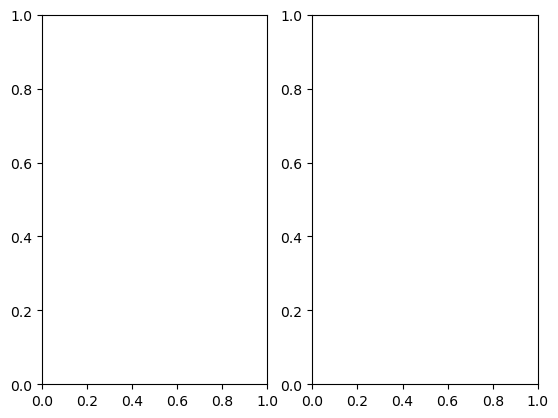

In [3]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2)


Matplotlib assumes the first two arguments are the number of subplot rows and columns. This is more compact code, although less transparent/explicit than using `nrows=` and `ncols=`

Note that in the above examples, we have replaced `ax` with `axs`. This is a convention, not a requirement, but it makes explicit the fact that the `ax` variable now contains multiple axes objects, which is how we specify which subplot to draw into with any command.

Try running the following code, which will generate a figure with two subplots, and print out what the `axs` object contains:

~~~python
import matplotlib.pyplot as plt
x = range(0, 10)
y = range(0, 10)

fig, axs = plt.subplots(nrows=1, ncols=2)
print(axs)
~~~

[<Axes: > <Axes: >]


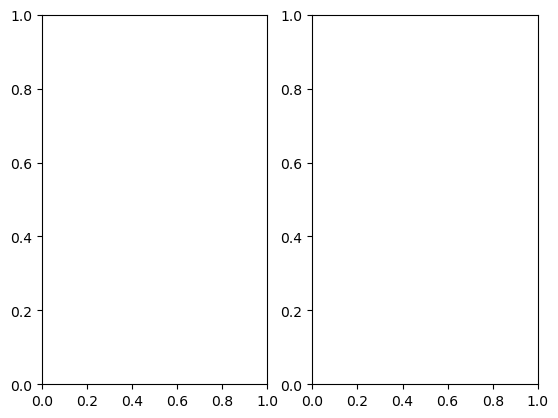

In [5]:
import matplotlib.pyplot as plt
x = range(0, 10)
y = range(0, 10)

fig, axs = plt.subplots(nrows=1, ncols=2)
print(axs)
plt.show()

The output is a little confusing because the `plt.subplots()` function generates an empty plot, but this appears under the result of printing the `axs`, even though the plot command was run first. 

Regardless, note that the `axs` object contains two `AxesSubplot` objects. This means that to access (and draw into) one of these obejcts, we can use indexing on `axs`. For example, to draw into the first subplot, we can use `axs[0]`:

~~~python
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].plot(x, y)
plt.show()
~~~

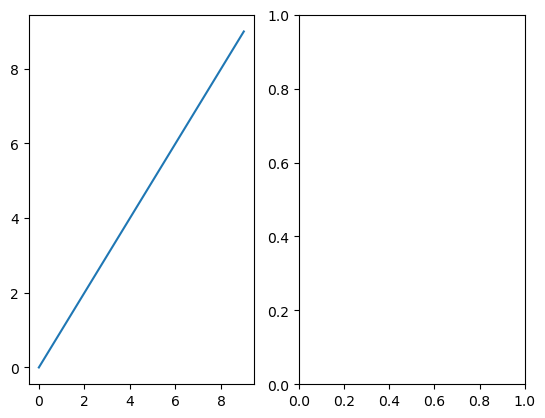

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].plot(x, y)
plt.show()

To draw into the second subplot, we use `axs[1]`:

~~~python
# Generate different data for second plot, going from 9 to 0
y2 = list(reversed(range(10)))

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].plot(x, y)
axs[1].plot(x, y2)
plt.show()
~~~

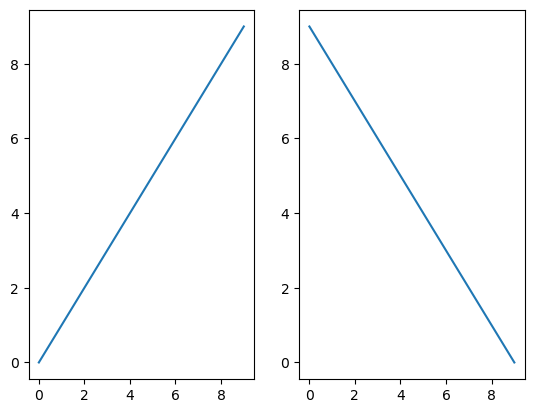

In [10]:
y2 = list(reversed(range(10)))

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].plot(x, y)
axs[1].plot(x, y2)
plt.show()

We can modify properties of each subplot separately, using their `axs` indices. We can also modify properties of the entire figure (such as an overall title) using `fig.` methods:

~~~python
fig, axs = plt.subplots(nrows=1, ncols=2)

# First subplot
axs[0].plot(x, y)
axs[0].set_title('Positive correlation')

# Second subplot
axs[1].plot(x, y2)
axs[1].set_title('Negative correlation')

# Set overall figure title
fig.suptitle('Two types of perfect correlations')

plt.show()
~~~

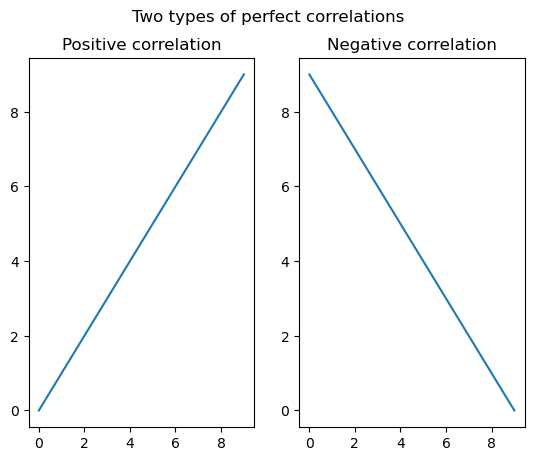

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=2)

# First subplot
axs[0].plot(x, y)
axs[0].set_title('Positive correlation')

# Second subplot
axs[1].plot(x, y2)
axs[1].set_title('Negative correlation')

# Set overall figure title
fig.suptitle('Two types of perfect correlations')

plt.show()

## 2D subplots

When you have a figure with multiple rows and columns of subplots, the indexing of `AxesSubplot` objects is two-dimensional. This is similar to indexing a pandas DataFrame, where we might specify a position with [row, column] indexing (e.g., `df.iloc[1, 2]` to get the second row, third column).

The only tricky thing about this is that if you have a one-dimensional figure (i.e., one row and multiple columns, or one column and multiple rows), you only need to use a single index (the column or row position, respectively), as shown in the examples above. However, as soon as you generate a figure with multiple rows *and* columns, you need to use two-dimensional indexing. 

So for example, with one column but two rows, we can use the following:

~~~python

# First subplot
axs[0].plot(x, y)
axs[0].set_title('Positive correlation')

# Second subplot
axs[1].plot(x, y2)
axs[1].set_title('Negative correlation')

plt.show()
~~~

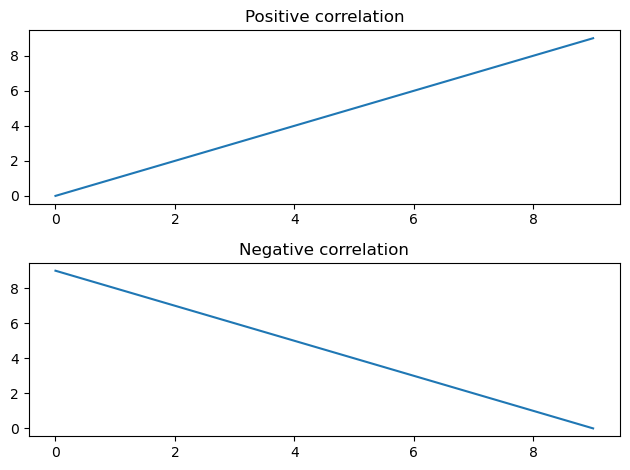

In [18]:
fig, axs = plt.subplots(nrows=2, ncols=1)

# First subplot
axs[0].plot(x, y)
axs[0].set_title('Positive correlation')

# Second subplot
axs[1].plot(x, y2)
axs[1].set_title('Negative correlation')

plt.tight_layout() # the negative correlation title was overlapping until I added this
plt.show()

But when we have two rows *and* two columns, we need to use 2D indexing:

~~~python
fig, axs = plt.subplots(nrows=2, ncols=3)

# First subplot
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Positive correlation')

# Second subplot
axs[0, 1].plot(x, y2)
axs[0, 1].set_title('Negative correlation')

plt.show()
~~~

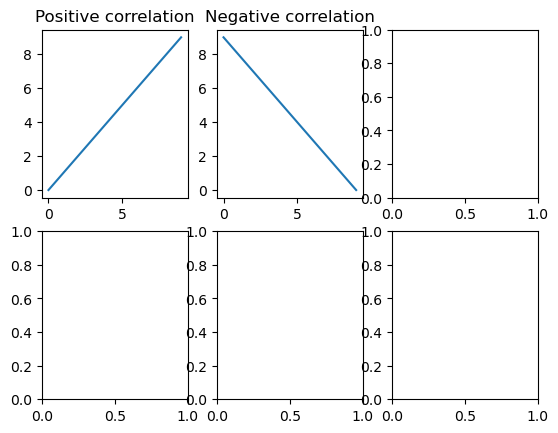

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=3)

# First subplot
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Positive correlation')

# Second subplot
axs[0, 1].plot(x, y2)
axs[0, 1].set_title('Negative correlation')

plt.show()

## Basic Formatting with subplots

### Figure size
You might have noticed two annoying things about the above figures with subplots. Firstly, the subplots aren't square, but our *x* and *y* axes cover the same range, so ideally they would be of the same length in the plot. We can set the figure size with an additional `figsize` kwarg to `plt.subplots()`, giving it a list of `[width, height]`. Note that this specifies the width and height of the entire figure. So in the example below, since we are plotting two rows and one column, we make the height double the width:

~~~python
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=[5, 10])
~~~

This can require some trial-and-error, because the height in this case also includes the plot titles, so the results will not look perfectly square.


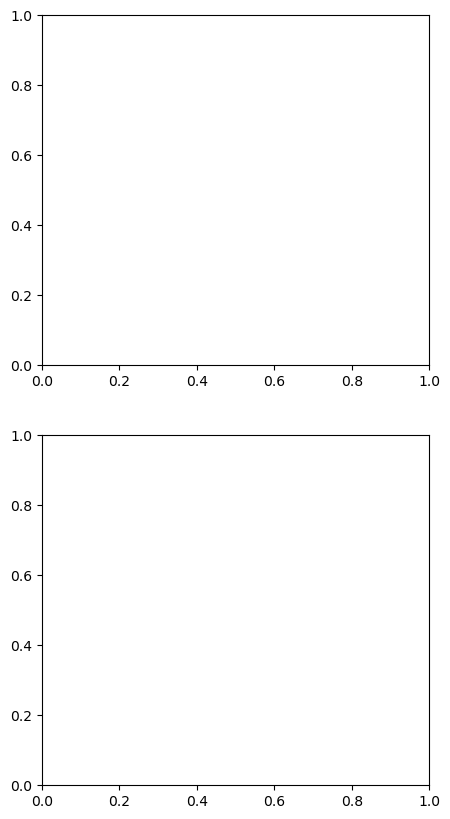

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=[5, 10])


### Avoiding overlap
The other annoying thing is that, specifically in the two-row-one-column plot above, the title of the bottom subplot overlaps with the tick labels for the top *x* axis. Matplotlib has a handy function that automatically corrects this in most cases:

~~~python
plt.tight_layout()
~~~

To put this altogether, try the following:
~~~python
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=[5, 10])

# First subplot
axs[0].plot(x, y)
axs[0].set_title('Positive correlation')

# Second subplot
axs[1].plot(x, y2)
axs[1].set_title('Negative correlation')

plt.tight_layout()
plt.show()
~~~

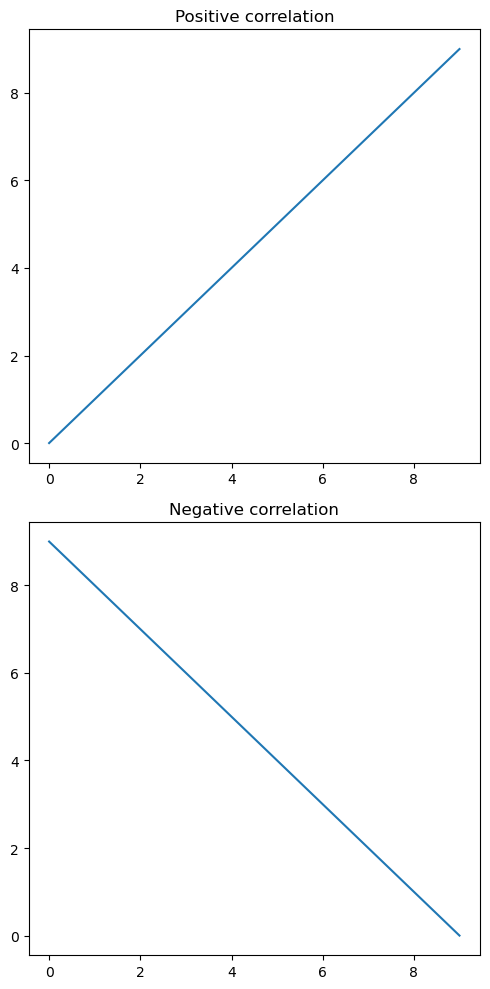

In [17]:

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=[5, 10])

# First subplot
axs[0].plot(x, y)
axs[0].set_title('Positive correlation')

# Second subplot
axs[1].plot(x, y2)
axs[1].set_title('Negative correlation')

plt.tight_layout()
plt.show()

---
## Summary of Key Points
- Using `plt.subplots()`, we can generate figures containing multiple subplots
- The number of rows and columns of subplots in a figure is set by the `nrows=` and `ncols=` kwargs, or alternatively just providing the number of rows and columns as the first arguments to `plt.subplots()`
- When creating a figure with subplots, it's good practice to assign the result to `fig, axs` rather than `fig, ax`, to reflect the fact that `axs` is an object containing all of the axes
- The different axes of a subplot are accessed (such as for drawing into, or modifying properties) using indexing, as in `axs[0]`
- If a figure's layout is two-dimensional (i.e., > 1 rows and > 1 columns), then two-dimensional indexing is required for axes (e.g., `axs[0, 1]`)
- The figure's overall size is set by the `figsize=` kwarg to `plt.subplots()`
- Avoid overlapping elements in subplots by running `plt.tight_layout()` right before `plt.show()`